In [1]:
library(arules)

Warning message:
"package 'arules' was built under R version 3.3.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [2]:
gr = read.transactions("groceries.csv", sep = ",")

In [3]:
summary(gr)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [4]:
itemFrequency(gr)

abrasive cleaner          artif. sweetener            baby cosmetics 
             0.0035587189              0.0032536858              0.0006100661 
                baby food                      bags             baking powder 
             0.0001016777              0.0004067107              0.0176919166 
         bathroom cleaner                      beef                   berries 
             0.0027452974              0.0524656838              0.0332486019 
                beverages              bottled beer             bottled water 
             0.0260294865              0.0805287239              0.1105236401 
                   brandy               brown bread                    butter 
             0.0041687850              0.0648703610              0.0554143366 
              butter milk                  cake bar                   candles 
             0.0279613625              0.0132180986              0.0089476360 
                    candy               canned beer               canned fish 
             0.0298932384              0.0776817489              0.0150482969 
             canned fruit         canned vegetables                  cat food 
             0.0032536858              0.0107778343              0.0232841891 
                  cereals               chewing gum                   chicken 
             0.0056939502              0.0210472801              0.0429079817 
                chocolate     chocolate marshmallow              citrus fruit 
             0.0496187087              0.0090493137              0.0827656329 
                  cleaner           cling film/bags              cocoa drinks 
             0.0050838841              0.0113879004              0.0022369090 
                   coffee            condensed milk         cooking chocolate 
             0.0580579563              0.0102694459              0.0025419420 
                 cookware                     cream              cream cheese 
             0.0027452974              0.0013218099              0.0396542959 
                     curd               curd cheese               decalcifier 
             0.0532791052              0.0050838841              0.0015251652 
              dental care                   dessert                 detergent 
             0.0057956279              0.0371123538              0.0192170819 
             dish cleaner                    dishes                  dog food 
             0.0104728012              0.0175902389              0.0085409253 
            domestic eggs  female sanitary products         finished products 
             0.0634468734              0.0061006609              0.0065073716 
                     fish                     flour            flower (seeds) 
             0.0029486528              0.0173868836              0.0103711235 
   flower soil/fertilizer               frankfurter            frozen chicken 
             0.0019318760              0.0589730554              0.0006100661 
           frozen dessert               frozen fish             frozen fruits 
             0.0107778343              0.0116929334              0.0012201322 
             frozen meals    frozen potato products         frozen vegetables 
             0.0283680732              0.0084392476              0.0480935435 
    fruit/vegetable juice                    grapes                hair spray 
             0.0722928317              0.0223690900              0.0011184545 
                      ham            hamburger meat               hard cheese 
             0.0260294865              0.0332486019              0.0245043213 
                    herbs                     honey    house keeping products 
             0.0162684291              0.0015251652              0.0083375699 
         hygiene articles                 ice cream            instant coffee 
             0.0329435689              0.0250127097              0.0074224708 
    Instant food products                       jam        

In [5]:
sort(itemFrequency(gr))[1:10]

baby food  sound storage medium preservation products 
         0.0001016777          0.0001016777          0.0002033554 
                 bags       kitchen utensil        baby cosmetics 
         0.0004067107          0.0004067107          0.0006100661 
       frozen chicken        toilet cleaner       make up remover 
         0.0006100661          0.0007117438          0.0008134215 
       salad dressing 
         0.0008134215

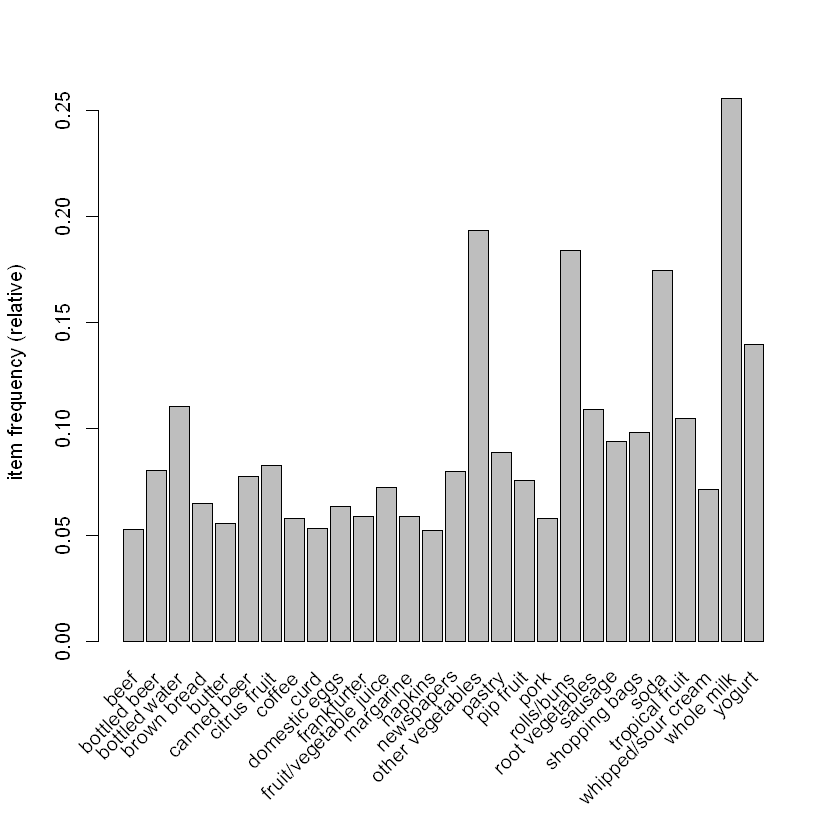

In [6]:
itemFrequencyPlot(gr, support = 0.05)

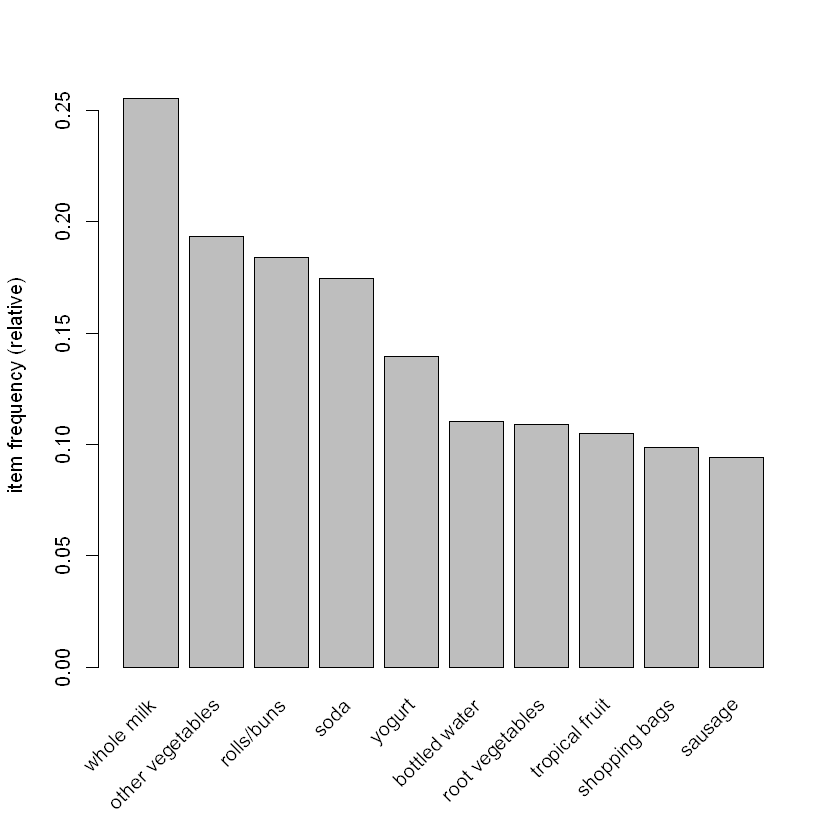

In [7]:
itemFrequencyPlot(gr, topN = 10)

In [8]:
rules = apriori(gr)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [9]:
rules = apriori(gr, parameter = list(support = 0.01, confidence = 0.05, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [513 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [10]:
inspect(rules)

      lhs                           rhs                           support confidence      lift
[1]   {hard cheese}              => {whole milk}               0.01006609 0.41078838 1.6076815
[2]   {butter milk}              => {other vegetables}         0.01037112 0.37090909 1.9169159
[3]   {other vegetables}         => {butter milk}              0.01037112 0.05359958 1.9169159
[4]   {butter milk}              => {whole milk}               0.01159126 0.41454545 1.6223854
[5]   {ham}                      => {whole milk}               0.01148958 0.44140625 1.7275091
[6]   {sliced cheese}            => {whole milk}               0.01077783 0.43983402 1.7213560
[7]   {oil}                      => {whole milk}               0.01128622 0.40217391 1.5739675
[8]   {onions}                   => {other vegetables}         0.01423488 0.45901639 2.3722681
[9]   {other vegetables}         => {onions}                   0.01423488 0.07356805 2.3722681
[10]  {onions}                   => {whole milk}  

In [11]:
whole_milk_rules = subset(rules, rhs %in% "whole milk") 

In [12]:
inspect(whole_milk_rules)

     lhs                           rhs             support confidence      lift
[1]  {hard cheese}              => {whole milk} 0.01006609  0.4107884 1.6076815
[2]  {butter milk}              => {whole milk} 0.01159126  0.4145455 1.6223854
[3]  {ham}                      => {whole milk} 0.01148958  0.4414062 1.7275091
[4]  {sliced cheese}            => {whole milk} 0.01077783  0.4398340 1.7213560
[5]  {oil}                      => {whole milk} 0.01128622  0.4021739 1.5739675
[6]  {onions}                   => {whole milk} 0.01209964  0.3901639 1.5269647
[7]  {berries}                  => {whole milk} 0.01179461  0.3547401 1.3883281
[8]  {hamburger meat}           => {whole milk} 0.01474326  0.4434251 1.7354101
[9]  {hygiene articles}         => {whole milk} 0.01281139  0.3888889 1.5219746
[10] {salty snack}              => {whole milk} 0.01118454  0.2956989 1.1572618
[11] {sugar}                    => {whole milk} 0.01504830  0.4444444 1.7393996
[12] {waffles}                  => {whol

In [13]:
 whole_milk_soda_rules = subset(rules, lhs %ain% c("whole milk", "soda")) 

In [14]:
inspect(whole_milk_soda_rules)


    lhs                  rhs                support    confidence lift    
[1] {soda,whole milk} => {yogurt}           0.01047280 0.2614213  1.873964
[2] {soda,whole milk} => {other vegetables} 0.01392984 0.3477157  1.797049
